In [1]:
import glob
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import sparse

sys.path.append("..") # ugly workaround

from src.utils.vocab import load_vocab
from src.utils.figures import create_similarity_df, make_heatmap

## Data

In [2]:
# input files
vocab_file = "../data/working/vocab-wiki2021-V100.txt"

M_file = "../data/working/ft-wiki2021-V100-W10-D300-SG1-S1-NS5-NSE0.75.npy"
M_shuffled_files = glob.glob("../data/working/ft-wiki2021s*-V100-W10-D300-SG1-S1-NS5-NSE0.75.npy")
print(M_file)
print(M_shuffled_files)

../data/working/ft-wiki2021-V100-W10-D300-SG1-S1-NS5-NSE0.75.npy
['../data/working/ft-wiki2021s1-V100-W10-D300-SG1-S1-NS5-NSE0.75.npy']


In [3]:
# load vocab dicts
str2idx, idx2str, str2count = load_vocab(vocab_file)

In [4]:
# Create Dframe of words and counts
df = pd.DataFrame.from_dict(str2count, orient='index').reset_index()
df.columns = ['word','freq']
df['idx'] = idx2str

### Frequency groups


In [5]:
bins = np.arange(2, 9, .25)
bins[bins > 6] = max(np.log10(df['freq']))
bins = np.unique(bins)
df['freq_order'] = pd.cut(np.log10(df['freq']), bins=bins, right=True, include_lowest=True, precision=2)

df['freq_order'].value_counts(dropna=False).sort_index()

(1.99, 2.25]    69321
(2.25, 2.5]     47037
(2.5, 2.75]     31475
(2.75, 3.0]     22757
(3.0, 3.25]     15557
(3.25, 3.5]     11083
(3.5, 3.75]      7823
(3.75, 4.0]      5327
(4.0, 4.25]      3902
(4.25, 4.5]      2678
(4.5, 4.75]      1953
(4.75, 5.0]      1302
(5.0, 5.25]       932
(5.25, 5.5]       526
(5.5, 5.75]       294
(5.75, 6.0]       150
(6.0, 8.12]       122
Name: freq_order, dtype: int64

## Similarity matrices

For each combination of frequency groups, `N_SAMPLES` pairs of words are sampled at random, and the average similarity of the pairs is computed. 

In [6]:
SEMILLA = 33
N_SAMPLES = 500

### Similarity

In [7]:
if M_file.endswith("npz"):
    M = sparse.load_npz(M_file)
elif M_file.endswith("npy"):
    M = np.load(M_file)

In [8]:
# PNGs params
dpi = 300
width = 1500
height = 1150
nombre = "FastText"

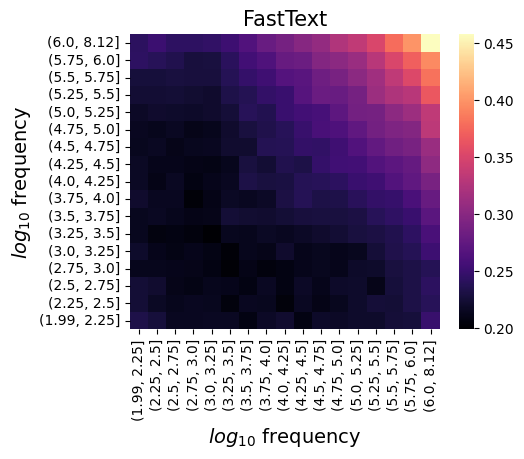

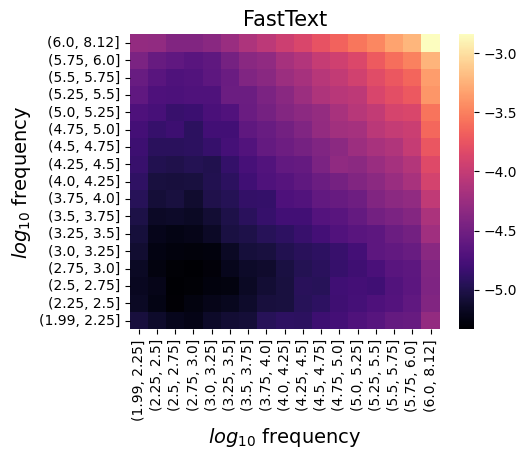

In [9]:
np.random.seed(SEMILLA)

df_similarity = create_similarity_df(
    df, M, 'freq_order', 'idx', n_samples=N_SAMPLES, normalize=True)

for c in ["cosine", "negative_distance"]:

    outfile = f"../results/plots/heatmap-{nombre}-{c}.png"
    ax = make_heatmap(df_similarity, 'freq_order', column=f"mean_{c}", cmap="magma")
    plt.title(nombre, fontsize=15)
    plt.xlabel("$log_{10}$ frequency", fontsize=14)
    plt.ylabel("$log_{10}$ frequency", fontsize=14)
    ax.figure.set_size_inches(width/dpi, height/dpi)
    plt.savefig(outfile, dpi=dpi, bbox_inches='tight')
    plt.show()
    plt.close(ax.figure)

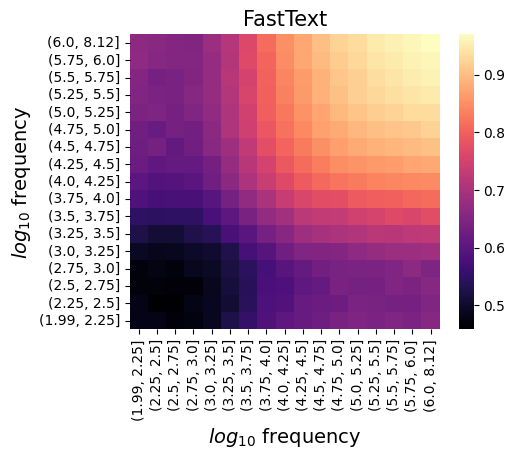

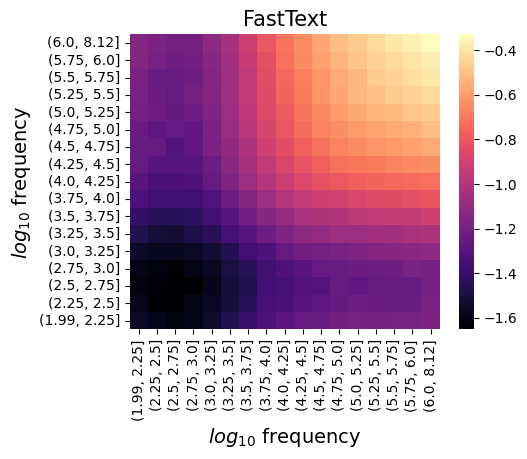

In [10]:
for i, f in enumerate(M_shuffled_files):
    
    if f.endswith("npz"):
        M_ = sparse.load_npz(f)
    elif f.endswith("npy"):
        M_ = np.load(f)

    np.random.seed(SEMILLA)

    df_shuf_ = create_similarity_df(
        df, M_, 'freq_order', 'idx', n_samples=N_SAMPLES, normalize=True)

    for c in ["cosine", "negative_distance"]:

        outfile = f"../results/plots/heatmap-{nombre}-{c}_s{i}.png"
        ax = make_heatmap(df_shuf_, 'freq_order', column=f"mean_{c}", cmap="magma")
        plt.title(nombre, fontsize=15)
        plt.xlabel("$log_{10}$ frequency", fontsize=14)
        plt.ylabel("$log_{10}$ frequency", fontsize=14)
        ax.figure.set_size_inches(width/dpi, height/dpi)
        plt.savefig(outfile, dpi=dpi, bbox_inches='tight')
        plt.show()
        plt.close(ax.figure)

    del M_

    if i == 1:
        break

---------------------------